In [88]:
# tutorial following https://www.youtube.com/watch?v=w8yWXqWQYmU
# using both MNIST and Fashion-MNIST datasets

In [25]:
import numpy as np
from numpy.typing import NDArray
np.random.seed(2024 - 1 - 21)
import pandas as pd
from numba import jit, njit
import matplotlib.pyplot as plt
import os
import gc

# ***Digit classification using MNIST***
-------------------

![MNIST](./MNIST/MnistExamplesModified.png)

In [87]:
# each image is a black and white 28 x 28 pixels array of 8 bit unsigned integers (8 bit pixel depth)
# pixel values range from 0 (white) to 255 (black)

# pixels per image
PPIMAGE: int = 28 * 28
PPIMAGE

784

In [98]:
# we could visualize the images as a matrix with N rows for each image with PPIMAGE number of columns
# when we transpose this we get a matrix where each column is made of PPIMAGE pixels from each image and 
# each row represents nth pixel from every image

$$\begin{bmatrix}
X_{0} \dots X_{784} \\
X_{785} \dots X_{1568} \\
\dots \\
\dots \\
\dots \\
\dots \\
X_{N - 784} \dots X_{N}\\
\end{bmatrix}_T = 
\begin{bmatrix}
X_{0} & X_{785} & \dots & X_{N - 784}\\
\vdots & \vdots & \vdots & \vdots \\
X_{784} & X_{1568} & \dots & X_{N}\\
\end{bmatrix}
$$

In [11]:
os.listdir(r"./MNIST/")

['MnistExamplesModified.png',
 't10k-images.idx3-ubyte',
 't10k-labels.idx1-ubyte',
 'train-images.idx3-ubyte',
 'train-labels.idx1-ubyte']

In [5]:
# our predictions will be the digit class (0..9)!
# we'll start with a simple neural network with just 3 layers.

# one input layer with 784 nodes (0th layer)
# one hidden layer with 10 nodes (1st layer)
# and an output layer with 10 nodes (2nd layer)

In [6]:
# the input layer does not really have any parameters.
# it's just the inputs.
# every node in the input layer corresponds to each of the pixel in the image, hence 784 nodes.
# similarly, the output layer corresponds to each of the 10 digits that could be recognized, hence 10 nodes.

In [8]:
# there's three parts to training a neural network

# 1) forward propagation
# 2) back propagation
# 3) 

In [16]:
mnist: list[NDArray[np.uint8]] = []

for file in os.listdir(r"./MNIST/")[1:]:
    with open(f"./MNIST/{file}", "rb") as fp:
        mnist.append(np.fromfile(fp, dtype = np.uint8))

In [18]:
test_x, test_y, train_x, train_y = mnist

In [22]:
train_x.size

47040016

In [37]:
# the binary image data is in the following format
# [offset] [type]          [value]          [description]
# 0000     32 bit integer  0x00000803(2051) magic number
# 0004     32 bit integer  10000            number of images
# 0008     32 bit integer  28               number of rows
# 0012     32 bit integer  28               number of columns
# 0016     unsigned byte   ??               pixel
# 0017     unsigned byte   ??               pixel

train_x[5:9]

array([  0, 234,  96,   0], dtype=uint8)

In [40]:
int.from_bytes(train_x[0:4], byteorder = "big")

2051

In [88]:
# we have 60,000 images

NIMAGES: int = int.from_bytes(train_x[4:8], byteorder = "big")
NIMAGES

60000

In [43]:
int.from_bytes(train_x[9:12], byteorder = "big")

28

In [44]:
int.from_bytes(train_x[12:16], byteorder = "big")

28

In [55]:
images = np.array([a.reshape(28, 28) for a in train_x[16:].reshape(60_000, PPIMAGE)])

In [56]:
images.shape

(60000, 28, 28)

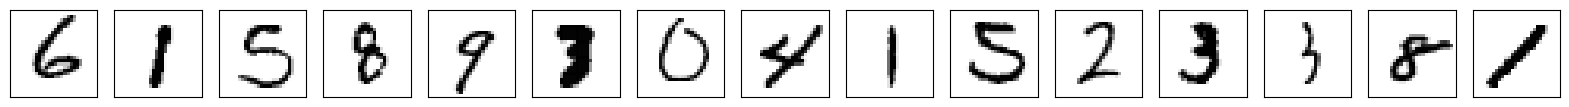

In [79]:
# we're good to go :)

fig, axes = plt.subplots(nrows = 1, ncols = 15)
fig.set_size_inches(20, 4)
for ax, idx in zip(axes, np.random.choice(np.arange(0, 60_000), size = 15, replace = False)):
    ax.imshow(images[idx], cmap = "binary")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [ ]:
# labels are organized as such

# [offset] [type]          [value]          [description]
# 0000     32 bit integer  0x00000801(2049) magic number (MSB first)
# 0004     32 bit integer  10000            number of items
# 0008     unsigned byte   ??               label
# 0009     unsigned byte   ??               label
# ........
# xxxx     unsigned byte   ??               label

# The labels values are 0 to 9. 

In [83]:
# there we go :)

np.unique(train_y[8:], return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [86]:
# oopsies

int.from_bytes(b'\t')

9

In [103]:
# let's get rid of the preceding unnecessary bytes

train_y = train_y[8:]

In [99]:
train_x = train_x[16:].reshape(NIMAGES, PPIMAGE)
train_x.shape

(60000, 784)

In [100]:
# we have 60,000 rows, each with pixels on 784 columns
# now we want to transpose this such that the pixels in each image forms a column and we end up with a 784 x 60,000 matrix

train_x.T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# @njit(parallel = True, fastmath = True)

class NNetwork():
    self.__init__()

# ***Fashion MNIST***
-------------------

![FASHION-MNIST](./Fashion-MNIST/fashion-mnist-sprite.png)

In [103]:
# there are 4 pieces of data
# a training images set, training labels, test set of images and test labels

os.listdir(r"./Fashion-MNIST/")

['fashion-mnist-sprite.png',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [28]:
# the datasets are binary files containing images as a string of 28 x 28 pixels

In [80]:
# the files prefixed with t10k contain the test data for 10,000 items (images and labels)
# each image is a 28 x 28 pixel greyscale image 
# and there are 10 different labels

fmnist: list[NDArray[np.uint8]] = []

for file in os.listdir(r"./Fashion-MNIST/")[1:]:
    with open(f"./Fashion-MNIST/{file}", "rb") as fp:
        fmnist.append(np.fromfile(fp, dtype = np.uint8))

In [32]:
# so it turns out we just have pixel values in 8 bits
# the training dataset contains 60,000 such images

60_000 * 28 * 28

47040000

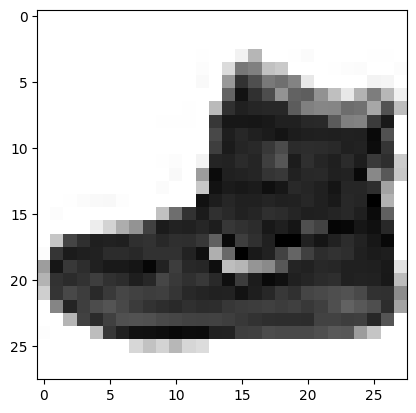

In [39]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# looks like a shoe 

plt.imshow(train_x[16:][: 28 * 28].reshape(28, 28), cmap = "binary")
plt.show()

In [61]:
train_images = np.array(np.hsplit(train_x[16:], 60_000))

In [62]:
28 * 28

784

In [81]:
# let's see how the train labels look

with open("./Fashion-MNIST/train-labels-idx1-ubyte", "r", encoding = "utf-16") as fp:
    labs = fp.read()

UnicodeError: UTF-16 stream does not start with BOM

In [82]:
# labels seem to be binary ASCII values separated by tabs (\t)

labs.split('\t')

['\x00\x00\x08\x01\x00\x00ê`',
 '\x00\x00\x03\x00\x02\x07\x02\x05\x05\x00',
 '\x05\x05\x07',
 '\x01\x00\x06\x04\x03\x01\x04\x08\x04\x03\x00\x02\x04\x04\x05\x03\x06\x06\x00\x08\x05\x02\x01\x06\x06\x07',
 '\x05',
 '\x02\x07\x03\x00\x03\x03\x03\x07\x02\x02\x06\x06\x08\x03\x03\x05\x00\x05\x05\x00\x02\x00\x00\x04\x01\x03\x01\x06\x03\x01\x04\x04\x06\x01',
 '\x01\x03\x05\x07',
 '\x07\x01\x07',
 '',
 '',
 '\x03\x02',
 '\x03\x06\x04\x01\x01\x08\x08\x00\x01\x01\x06\x08\x01',
 '\x07\x08\x08',
 '\x06\x06\x03\x01\x05\x04\x06\x07\x05\x05',
 '\x02\x02\x02\x07\x06\x04\x01\x08\x07\x07\x05\x04\x02',
 '\x01\x07\x04\x06',
 '\x07\x01\x08\x07\x01\x02\x08\x00',
 '\x01\x08\x07\x00\x05\x08\x06\x07\x02\x00\x08\x07\x01\x06\x02\x01',
 '\x06\x00\x01\x00\x05\x05\x01\x07\x00\x05\x08\x04\x00\x04\x00\x06\x06\x04\x00\x00\x04\x07\x03\x00\x05\x08\x04\x01\x01\x02',
 '\x02\x08\x05\x00\x06\x03\x04\x06\x00',
 '\x01\x07\x03\x08\x05\x08\x03\x08\x05\x02\x00\x08\x07\x00\x03\x05\x00\x06\x05\x02\x07\x05\x02\x06\x08\x02\x06\x08\x00